# EECS 531 - A1
### Tristan Maidment (tdm47)
### Assignment 1

#### Exercise 1: Blurring Filter

The first step is to import the necessary dependencies. I am using **NumPy**, **OpenCV** and **pyplot**.  Given the right dependencies are installed, the exercises can be run with different images, values, etc, if desired.

In [1]:
%matplotlib inline
import cv2
import math
from matplotlib import pyplot as plt
import numpy as np

Here, we read the image from the directory.  The last flag indicates that it is input as RGB. 

My intention is to be able to use the extra information provided by having three seperate channels for edge detection.

By default, **OpenCV** loads images in the BGR color space instead of RGB.  Since this is just a simple reordering, we can split the channels up, and merge them in the right order.

In [2]:
img = cv2.imread('./gnw.png', 1)
if img is not None:
    b,g,r = cv2.split(img)
    img = cv2.merge((r,g,b))

As a test, I display the image inline in the notebook.

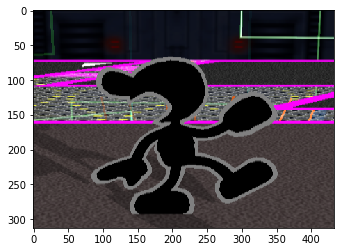

In [3]:
plt.imshow(img)
plt.show()

First we need to define a kernel, which will be convolved on the image.  

To start, I define a box blur, which is simply a matrix of 1s, divided by the number of elements of the matrix.  This will ensure the matrix sums up to 1, ensuring the channel intensities stay the same.

To test this filter, I use the built in convolution function, `cv2.filter2D`.

I will define a box blur of size 5.

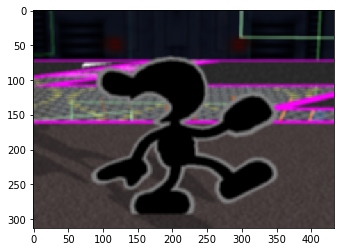

In [4]:
def kernel_box(size):
    return np.ones((size,size))/math.pow(size, 2)

blur = cv2.filter2D(img,-1,kernel_box(5))
plt.imshow(blur)
plt.show()

As we can see, the image appears to be *blurrier*.  We can conclude that the `kernel_box` definition works.

Next, we want to define the `convolve` function in order to apply a box filter by hand.  The convolution function works as follows:


1. Rotate the kernel 180 degrees (or flip on both axis).  This is done in order to follow the definition of a convolution, which stems from it's application in 1-D signals.  For symmetric applications, such as a box blur, this step does not affect the output.

2. For each pixel in the image, perform an element wise multiplication of the kernel with the current and surrounding pixels.  The kernel is positioned with the current pixel being the center pixel of the kernel.  The resulting matrix is then summed, and the output value is the new intensity of the pixel.

Due to the fact that the kernel may lay outside of the edges of the image, I create a image that has padded edges equal to half of the size of the kernel. This allows the kernel to work at the edges.  For the purpose of this exercise, I pad the image with pixels of zero intensity.

In [5]:
def convolve(img, kernel):
    kernel = np.flip(np.flip(kernel, 1), 0) #rotate the kernel 180 degrees
    
    width, height, channels = img.shape 
    k_width, k_height = kernel.shape
    
    k_half_width = math.floor(k_width/2)
    k_half_width_2 = math.ceil(k_width/2)
    k_half_height = math.floor(k_height/2)
    k_half_height_2 = math.ceil(k_height/2)
        
    ret = np.zeros(img.shape) 
    
    img_pad = np.zeros((width + k_width + 1 , height + k_width + 1, channels))
    img_pad[k_half_width : -k_half_width_2 - 1,
            k_half_height : -k_half_height_2 - 1] = img 
    
    for x in range(width):
        for y in range(height):
            for c in range(channels):
                ret[x, y, c] = np.multiply(kernel, img_pad[x: x + k_width, 
                                                            y  : y + k_height,
                                                            c]).sum()
    return ret/ret.max()

Now that the `convolve` function has been implemented, I will use it to add the box blur to the image.

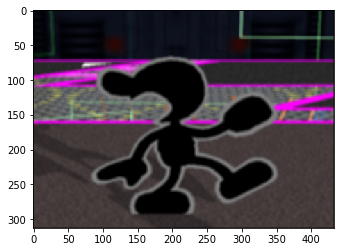

In [6]:
blur2 = convolve(img, kernel_box(5))
plt.imshow(blur2)
plt.show()

Out of curiosity, I wanted to implement another kernel using the `convolve` function.  For this example, I created a 3x3 Gaussian blur kernel, and filtered the same image.

The 3x3 Gaussian blur kernel is as follows:

\begin{equation*}
\ \frac{1}{16}\begin{vmatrix}
\ 1 & 2 & 1 \\
\ 2 & 4 & 2 \\
\ 1 & 2 & 1 \\
\end{vmatrix}
\end{equation*}

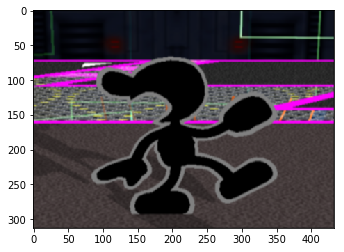

In [7]:
gaussian_3 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16
blur3 = convolve(img, gaussian_3)
plt.imshow(blur3)
plt.show()